Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [171]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [172]:
## Binary Search Tree
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node
    
    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    
    #def find_root():
    #    x = self.
    
    def search(self, value):
        if self.data == value:
            return self
        elif self.data > value and self.l_child != None:
            return self.l_child.search(value)
        elif self.data < value and self.r_child != None:
            return self.r_child.search(value)
        else:
            return None
            
    
    lst = []
    def inorder_help(self):
        
        
        if self.data != None:
            if self.l_child  != None:
                self.l_child.inorder_help()
            lst.append(self.data)
            if self.r_child  != None:
                 self.r_child.inorder_help()

    
    def inorder(self):
        self.inorder_help()
        a = lst[:]

        for i in range(len(a)):
            lst.remove(lst[0])
        return a
                    
        
 
        
    def transplant(self,v):
        if self.parent == None:
            v.parent = None
        elif self == self.parent.l_child:
            self.parent.l_child = v
        else:
            self.parent.r_child = v
        if v.data:
            v.parent = self.parent
            
    def delete(self, value):
        z = self.search(value)
        
        if z.l_child == None:
            self.transplant(z.r_child)
        elif z.r_child == None:
            self.transplant(z.l_child)
        
        else: 
            y == self.minimum
            
            if y.parent != z:
                self.transplant( y.r_child)
                y.r_child = z.r_child
                y.r_child.parent = y
            
            self.transplant(y)
            y.l_child = z.l_child
            y.l_child.parent = y
        
        return self.data 
    
    
    
    
    
    
    
    
        


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [173]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    count = 0
    x = root
    
    while x.data != node.data and (x.l_child != None or x.r_child != None):
        
        count += 1
        if x.data < node.data:
            x = x.r_child
        else:
            x = x.l_child
    
    if x.data == node.data:
        return count
    else:
        return None
    

In [174]:
# Testing code
import math

bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)

#print(bst.to_string())
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [175]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [176]:
lsst = []
def avg_cmp_help(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """

    if bst.data != None:
        if bst.l_child  != None:
            avg_cmp_help(bst.l_child)
        lsst.append(bst)
        if bst.r_child  != None:
            avg_cmp_help(bst.r_child)
    
    return lsst

def avg_cmp(bst):
    
    a = avg_cmp_help(bst)
    n = 0
    d = 0
   
    for i in lsst:
        n += 1
        d += (depth(bst, i) + 1)
    
    for i in range(len(lsst)):
        lsst.remove(lsst[0])
    
    return d/n
        
print(avg_cmp(bst))
print(lsst)

2.7777777777777777
[]


In [177]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [178]:
r_tree = 0
l_tree = 0

def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """

    if bst == None:
        return 0
    else:
        return 1 + max(height(bst.l_child), height(bst.r_child))
print(max_depth(bst))

4


In [179]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [180]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    return avg_cmp(bst) -1
    #raise NotImplementedError()

In [181]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

The average and the maximum depth scale together. This is because the position of an added note affect the average and the maximum height similar. If the node leads to a new maximum depth, it should also lead to a heigher average depth because a new large depth is added. Both scale with log(n) behaviour. This is because on average each paret tends to have two instead of one child.


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [206]:



import random

def test(a):
    N = []
    max_depths = []
    avg_depths = []
    nodes = []
    for i in range(a):
        nodes.append(Node(i))
        random.shuffle(nodes)
    t = None
        
    for i in range(a):
        N.append(i)

        if not t:
            t = nodes[i]
        else:
            t.insert(nodes[i])
    #print(t.to_string())
    #print()
    
        max_depths.append(max_depth(t))
        avg_depths.append(avg_depth(t))

    print(max_depths)
    print(avg_depths)

 
test(100) 


[1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12]
[0.0, 0.5, 0.6666666666666667, 1.0, 1.2000000000000002, 1.3333333333333335, 1.5714285714285716, 1.625, 1.8888888888888888, 2.1, 2.1818181818181817, 2.25, 2.4615384615384617, 2.5714285714285716, 2.7333333333333334, 2.875, 3.0588235294117645, 3.2222222222222223, 3.3684210526315788, 3.3499999999999996, 3.428571428571429, 3.5, 3.4782608695652177, 3.541666666666667, 3.6399999999999997, 3.730769230769231, 3.7407407407407405, 3.8571428571428568, 3.9655172413793105, 4.1, 4.096774193548387, 4.09375, 4.181818181818182, 4.176470588235294, 4.257142857142857, 4.361111111111111, 4.45945945945946, 4.447368421052632, 4.512820512820513, 4.525, 4.5609

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

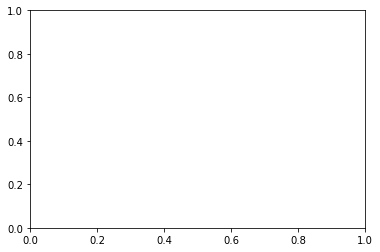

In [207]:
import matplotlib.pyplot as plt
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()